# How Covid-19 Has Effected Education Globally and Locally in the UK

<font size="4">As we are all aware Covid-19 has had a drastic effect on practically every aspect of our lives and one aspect that has drastically been affected is our education. The purpose of this blog post is to explore through visual aids the impact Covid has had on education both globally and within the United Kingdom. </font> 

# Section 1: Global Effect on School Closure

In [1]:
%matplotlib inline
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap
import numpy as np
import geopandas as gpd
from shapely import speedups
speedups.disable()

In [2]:
# import the relevant data and remove any duplicates.
covid_df = pd.read_csv (r'C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Data Science for Economics\CA2\Q3 Data\owid-covid-data.csv')
covid_df = covid_df[~ covid_df.duplicated()] 
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# create a dataframe of data relating to 01/01/2021
covid_2021_df = covid_df[(covid_df['date'] == "23/03/2020")]

In [4]:
# import the world shapefile.
map_df = gpd.read_file(r'C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Data Science for Economics\CA2\Q3 Data\World_Countries__Generalized_.shp')

In [5]:
# merge the map dataframe with the covid dataframe.
merged2 = map_df.set_index('COUNTRYAFF').join(covid_2021_df.set_index('location'))
merged2 = merged2.dropna(axis=0, subset=['total_cases'])

<AxesSubplot:title={'center':'Total Cases by Country 23/03/2020'}>

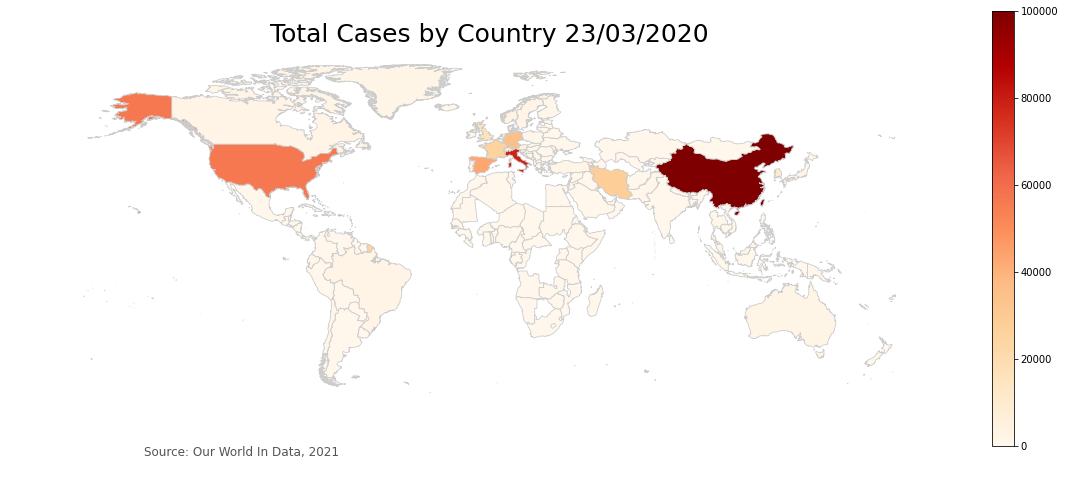

In [6]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = 0, 100000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
# add a title
ax.set_title('Total Cases by Country 23/03/2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Our World In Data, 2021',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged2.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

<font size="4">Above is a geographical plot showing the total cases of covid-19 per million present in each country on the 23rd March 2020. From this map, it seems like the majority of the world is experiencing low amounts of covid cases with only particular areas, such as the US, China and Italy having over approximately 60,000 total cases. Regions such as Africa, South America, Australasia and Canada have managed to keep their amount of cases fairly low perhaps due to their response to the virus and the amount of time covid has been present in the region. Some countries, such as Russia, lack data at this time and as such have been left out of the plot. </font> 

In [7]:
# import scchools data/
schools_df = pd.read_csv (r'C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Data Science for Economics\CA2\Q3 Data\school_closure.csv')
schools_df = schools_df[~ schools_df.duplicated()] 

In [8]:
# rename columns in the schools dataframe.
schools_df.rename(columns = {'Countryname':'Country Name'}, inplace=True)
schools_df.rename(columns = {'Statusof Schoolsaresomeall (copy) (group)':'Closure Status'}, inplace=True)

In [9]:
# display schools dataframe by columns.
schools_df = schools_df[['Country Name', 'Closure Status']]
schools_df

,Country Name,Closure Status
0,Eritrea,Closed
1,Guinea-Bissau,Closed
2,Mongolia,Closed
3,Philippines,Closed
4,Bulgaria,Closed
5,Malaysia,Closed
6,Thailand,Closed
7,Timor-Leste,Closed
8,Indonesia,Closed
9,West Bank and Gaza,Closed


<font size="4">It is not surprising to most to hear that schools are a haven for contagions. Children who tend to give little care to hygiene and social distancing quickly pass on the virus when enclosed in a small space. As such many nations have decided to close schools to inhibit the spread of covid-19. The above table shows a variety of countries and their policy towards school closure between early and mid 2020. We will be visually exploring this data in the next sections. </font> 

In [10]:
# merge the map dataframe with the schools dataframe.
merged3 = map_df.set_index('COUNTRYAFF').join(schools_df.set_index('Country Name'))

<AxesSubplot:title={'center':'School Closure Status by Country Early 2020 - Mid 2020'}>

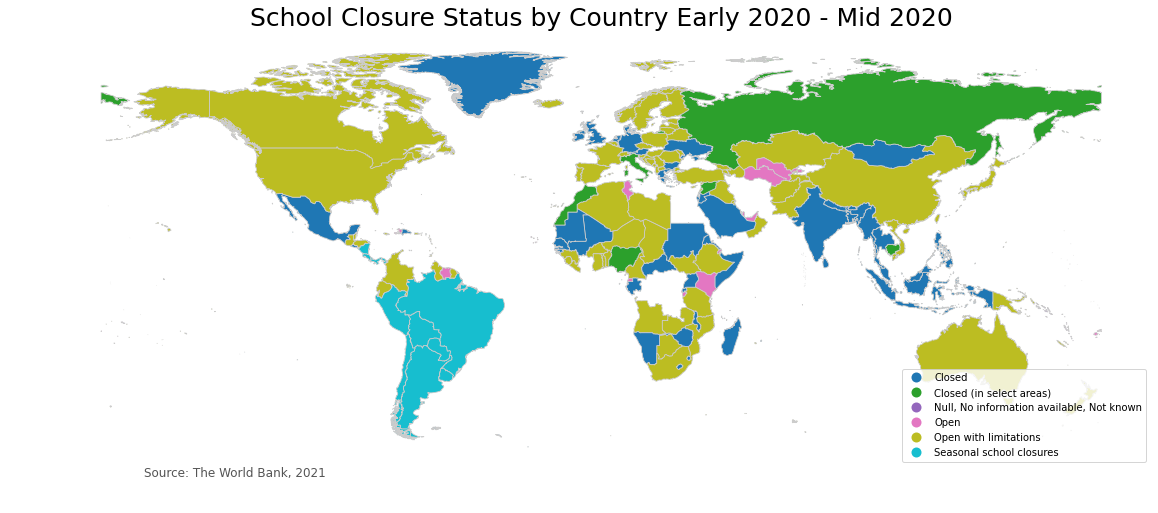

In [11]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Closure Status'
# set the range for the choropleth
#vmin, vmax = 0, 100000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
# add a title
ax.set_title('School Closure Status by Country Early 2020 - Mid 2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: The World Bank, 2021',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

merged3.plot(column=variable, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'loc': 'lower right'})

<font size="4">The pre-mentioned table is displayed above as a geographical plot showing the closure status of individual countries. This gives us a better view of the overall global status of school closures. As we can see the majority of countries schools are open with limitations even in areas such as Africa and Canada where the previous plot showed low amounts of cases. This decision, despite their low number of cases, is based on the need to keep these cases low by halting the spread and from following the decisions and advice of other nations. Despite the high number of cases present in China and the US, their schools remain open with limitations perhaps due to their large populations, where complete school closure would have a greater effect on the populace, or their lack of preparedness to switch to remote learning. Very few countries, such as Suriname, Ken, Turkmenistan and Uzbekistan, remain open without limitations despite the majority of their surrounding nations implementing limitations. This is most likely due to the decisions of their local governments. </font> 

In [12]:
# create a closure dataframe and rename its columns.
closure_df = schools_df.groupby('Closure Status').count()
closure_df.rename(columns = {'Country Name':'Quantity'}, inplace=True)
closure_df

,Quantity
Closure Status,
Closed,57
Closed (in select areas),6
"Null, No information available, Not known",7
Open,25
Open with limitations,94
Seasonal school closures,10


<font size="4">But how does the previous geographical plot translate to raw quantities? The above table provides this data showing the number of countries implementing each closure status. We can now confirm our previous statement that the majority of countries are operating with an open with limitations status followed closely by closed entirely.  </font> 

Text(0.1, 0.08, 'Source: The World Bank, 2021')

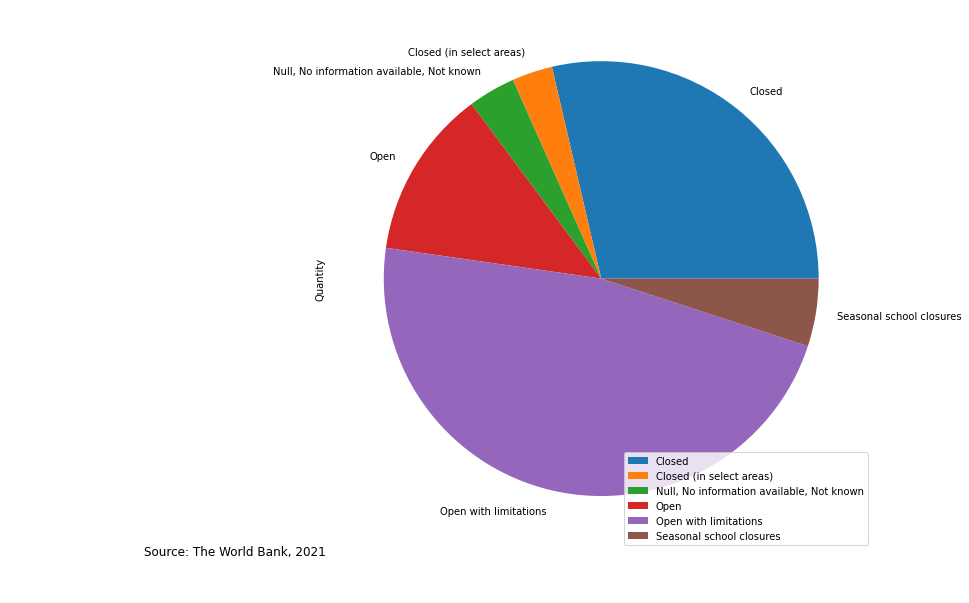

In [13]:
# plot a pie chart using the closure dataframe.
closure_df.plot(kind='pie', y = 'Quantity', figsize=(20,10))
plt.legend(loc='lower right')
plt.annotate('Source: The World Bank, 2021',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12)

<font size="4"> The quantities of closure status are displayed here as a pie chart showing the proportions of closure status among all countries in our dataset. </font> 

<font size="4"> This section of the blog has seeked to emphasis the the effect that Covid-19 has had on the availability of schools worldwide. The data presented to us shows that 167 countires in our dataset have had to change the way that schools operate. The effect this operational change will have on the performance and wellbeing of school children is appropriate for further exploration.  </font>

# Section 1: Data and Sources

Cases by Country Data: [Our World in Data](https://ourworldindata.org/) 

School Closure Data: [The World Bank](https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19)

# Section 2: Local Effect on University Student Mental Health

<font size="4"> In this section, we will be exploring the mental health survey scores of university students attending University College London between late March to October 2020. Universities in the UK have remained open during Covid-19 lockdown, however, they have adopted a primarily remote learning approach with students completing lectures and submitting work online. For the most part, this means students in the UK have been deprived of the prominent social aspects of University. As such, we will be exploring how the Covid lockdown has mentally affected some University students lacking this social interaction. In the UK lockdown measures legally came into force on the 26th March 2020 and our data was starting to be collected on the 23rd March 2020. This data spans from halfway through the last term of the academic year and proceeds to summer break starting approximately late May to early June. </font>

In [14]:
# import the anxiety scores data.
anxiety_df = pd.read_csv (r'C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Data Science for Economics\CA2\Q3 Data\Mean_anxiety_scores.csv')
anxiety_df = anxiety_df[~ anxiety_df.duplicated()] 

In [15]:
# format the anxiety scores dataframe.
anxiety_df['date'] = pd.to_datetime(anxiety_df['week starting'], dayfirst=True)
anxiety_df['Days Since 23/03/2020'] = (anxiety_df['date']) - pd.to_datetime('23/03/2020', dayfirst=True)
anxiety_df["Days Since 23/03/2020"] = anxiety_df["Days Since 23/03/2020"].dt.days
anxiety_df.rename(columns = {'GAD - university students':'GAD-7 Score - University Students'}, inplace=True)
anxiety_df.rename(columns = {'week starting':'Week Starting'}, inplace=True)
anxiety_df.dropna(axis=0, subset=['GAD-7 Score - University Students'], inplace=True)

In [16]:
anxiety_df[['Week Starting', 'GAD-7 Score - University Students']]

,Week Starting,GAD-7 Score - University Students
0,23/03/2020,8.206004
1,30/03/2020,7.721328
2,06/04/2020,7.552901
3,13/04/2020,7.581020
4,20/04/2020,7.626058
5,27/04/2020,7.539668
6,04/05/2020,7.402543
7,11/05/2020,7.180541
8,18/05/2020,7.339227
9,25/05/2020,6.810202


<font size="4"> Here we can see the student's scores when testing their Generalised Anxiety Disorder 7 score. </font>

In [17]:
# import the depression scores data.
depression_df = pd.read_csv (r'C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Data Science for Economics\CA2\Q3 Data\Mean_depression_scores.csv')
depression_df = depression_df[~ depression_df.duplicated()] 

In [18]:
# format the depression scores dataframe.
depression_df['date'] = pd.to_datetime(depression_df['week starting'], dayfirst=True)
depression_df['Days Since 23/03/2020'] = (depression_df['date']) - pd.to_datetime('23/03/2020', dayfirst=True)
depression_df["Days Since 23/03/2020"] = depression_df["Days Since 23/03/2020"].dt.days
depression_df.rename(columns = {'PHQ-9 - university students':'PHQ-9 Score - University Students'}, inplace=True)
depression_df.rename(columns = {'week starting':'Week Starting'}, inplace=True)
depression_df.dropna(axis=0, subset=['PHQ-9 Score - University Students'], inplace=True)

In [19]:
depression_df[['Week Starting', 'PHQ-9 Score - University Students']]

,Week Starting,PHQ-9 Score - University Students
0,23/03/2020,9.008282
1,30/03/2020,9.356137
2,06/04/2020,9.433447
3,13/04/2020,9.545211
4,20/04/2020,9.477158
5,27/04/2020,9.824610
6,04/05/2020,9.498423
7,11/05/2020,9.389247
8,18/05/2020,9.378855
9,25/05/2020,8.642180


<font size="4"> This table shows us the students scores when testing their PHQ-9 score. The PHQ-9 depression module questionairre is a popular test to determine somones severity of depression. </font>

In [20]:
# import the loneliness scores data.
loneliness_df = pd.read_csv (r'C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Data Science for Economics\CA2\Q3 Data\Mean_loneliness_scores.csv')
loneliness_df = loneliness_df[~ loneliness_df.duplicated()] 

In [21]:
# format the loneliness scores dataframe.
loneliness_df['date'] = pd.to_datetime(loneliness_df['week starting'], dayfirst=True)
loneliness_df['Days Since 23/03/2020'] = (loneliness_df['date']) - pd.to_datetime('23/03/2020', dayfirst=True)
loneliness_df["Days Since 23/03/2020"] = loneliness_df["Days Since 23/03/2020"].dt.days
loneliness_df.rename(columns = {'loneliness - university students':'Loneliness Score - University Students'}, inplace=True)
loneliness_df.rename(columns = {'week starting':'Week Starting'}, inplace=True)
loneliness_df.dropna(axis=0, subset=['Loneliness Score - University Students'], inplace=True)

In [22]:
loneliness_df[['Week Starting', 'Loneliness Score - University Students']]

,Week Starting,Loneliness Score - University Students
0,23/03/2020,5.460662
1,30/03/2020,5.384306
2,06/04/2020,5.478669
3,13/04/2020,5.505819
4,20/04/2020,5.646362
5,27/04/2020,5.653704
6,04/05/2020,5.584926
7,11/05/2020,5.651844
8,18/05/2020,5.639779
9,25/05/2020,5.625891


<font size="4"> Here we can see the student's scores when testing their loneliness score. </font>

In [23]:
# create score by time dataframes.
time_anxiety_df = anxiety_df[['Days Since 23/03/2020', 'GAD-7 Score - University Students']]
time_depression_df = depression_df[['Days Since 23/03/2020', 'PHQ-9 Score - University Students']]
time_loneliness_df = loneliness_df[['Days Since 23/03/2020', 'Loneliness Score - University Students']]

In [24]:
# set the characteristics of each sub-plot.
def style_ax(ax):
    ax.legend(loc='lower right')
    ax.set_xlabel('Days Since 23/03/2020')
    axs[0].set_ylabel('GAD-7 Score - University Students')
    axs[1].set_ylabel('PHQ-9 Score - University Students')
    axs[2].set_ylabel('Loneliness Score - University Students')
    ax.annotate('Source: Our World In Data, 2021',xy=(0.1, .05),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

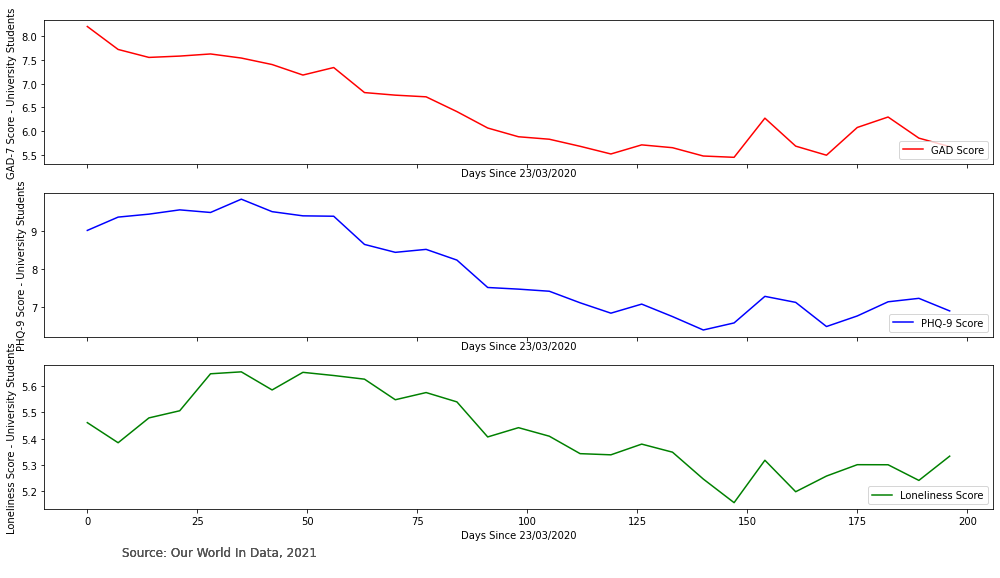

In [25]:
# plot supplots for each score as time increases.
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(17, 9))

axs[0].plot(time_anxiety_df['Days Since 23/03/2020'], time_anxiety_df['GAD-7 Score - University Students'], label = 'GAD Score', color = 'red')
axs[1].plot(time_depression_df['Days Since 23/03/2020'], time_depression_df['PHQ-9 Score - University Students'], label = 'PHQ-9 Score', color = 'blue')
axs[2].plot(time_loneliness_df['Days Since 23/03/2020'], time_loneliness_df['Loneliness Score - University Students'], label = 'Loneliness Score', color = 'green')

# style all sub-plots.
for ax in axs:
    style_ax(ax)

plt.show()

<font size="4"> The prementioned tables have been shown here as subplots each of which displaying the change in mental health test score as time progresses. Each test used in this survey is a popular means of determining the severity of mental health areas. The results that we get from these plots are rather surprising, let's explore each one individually. The GAD-7 score indicates the persons level of anxiety and as we can see from the plot the anxiety of students in the survey gradually falls until around 150 days after the start of the survey and begins to spike in periods. This indicates that since the first lockdown began students anxiety began to fall which is rather surprising as I'm sure we would all guess the opposite due to the stress involved with an impending lockdown. However, this anxiety reduction could be caused by the imminent end of the academic year. Anxiety scores start significantly dropping approximately 50 days after 23/03/2020 which is roughly the end of the exam period and close to the start of summer break. This anxiety reduction can most l, likely be attributed to the decrease in stress the students are feeling as their work comes to an end after roughly 50 days. However, there is also the case that students are feeling a sense of relief from less social interaction and will only start to feel its negative effects after a longer period than this survey ran for. The PHQ-9 depression scores of students follow a very similar curve to their anxiety scores. This is unsurprising as anxiety and depression are very closely linked and can be seen to cause each other. The loneliness of a student was determined through their own opinion on a basis of between 0 and 10. The loneliness scores are erratic and show a non-steady decline in loneliness as time goes on. This is also rather surprising as you would expect loneliness to increase during a lockdown. However, it can be said that the majority of students live with at least one other student and as such will have company during a lockdown to combat loneliness. As the academic year ends students return home to their families which in turn for most will lower their loneliness score. In conclusion, the provided data shows us an unexpected result which is that since the start of the UK lockdown the mental health of students at University College London has been gradually improving. This conclusion can also be due to the coinciding end of the academic year and as such is hard to grasp the overall effect covid-19 has had on the mental health of students.  </font>
 

# Section 2: Data and Sources

University Student Mental Health Survey Data: [Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/educationandchildcare/articles/coronavirusandtheimpactonstudentsinhighereducationinenglandseptembertodecember2020/2020-12-21)

<font size="4"> Thank you very much for reading and i hope this blog post has been insightful.</font>